In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [22]:
df=pd.read_csv('/content/raw_analyst_ratings.csv')

In [23]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [24]:
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
0


In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [26]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

df['cleaned_headline'] = df['headline'].apply(clean_text)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


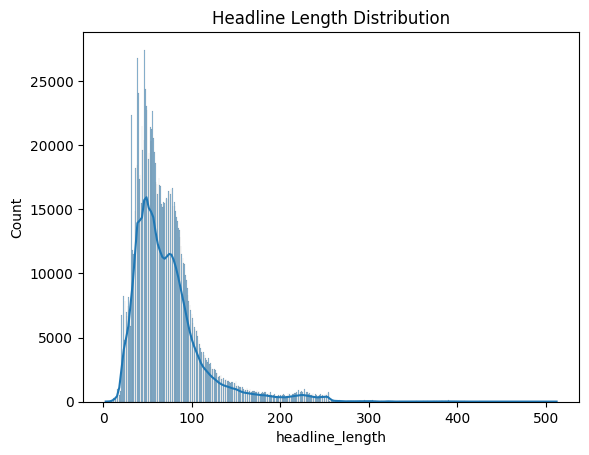

In [27]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'], kde=True)
plt.title('Headline Length Distribution')
plt.show()

In [30]:
publisher_count = df['publisher'].value_counts()
publisher_count

,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
...,...
Shazir Mucklai - Imperium Group,1
Laura Jennings,1
Eric Martin,1


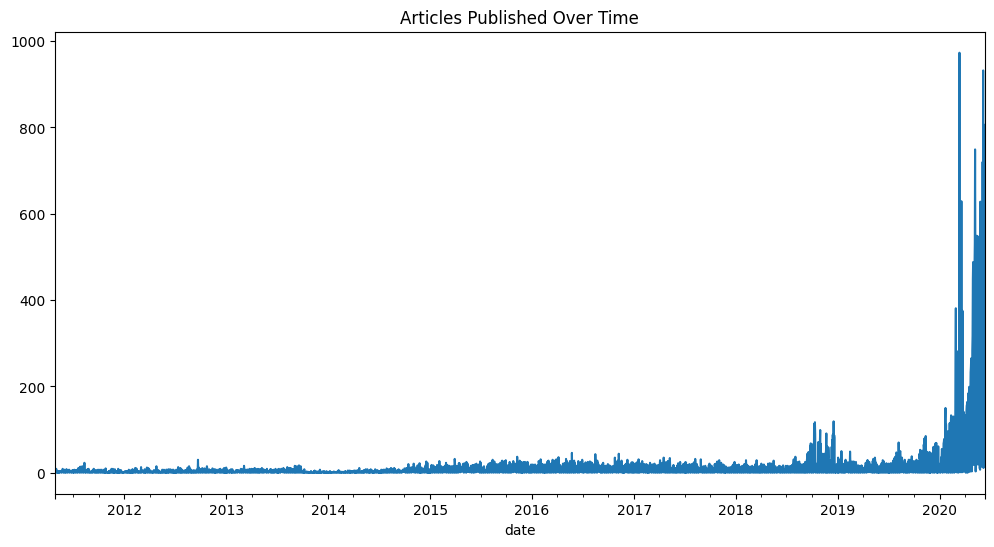

In [31]:
df.set_index('date')['headline'].resample('D').count().plot(figsize=(12, 6))
plt.title('Articles Published Over Time')
plt.show()

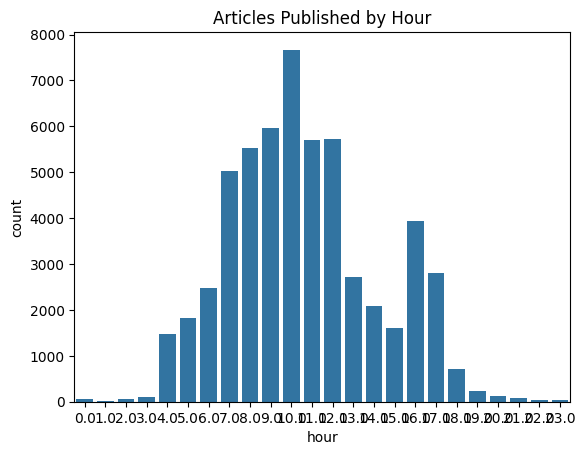

In [39]:
sns.countplot(x='hour', data=df)
plt.title('Articles Published by Hour')
plt.show()

In [43]:
df.groupby('hour')['headline'].count()

,headline
hour,
0.0,67
1.0,14
2.0,57
3.0,93
4.0,1469
5.0,1829
6.0,2476
7.0,5033
8.0,5527


In [44]:
df['sentiment'] = df['cleaned_headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [45]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

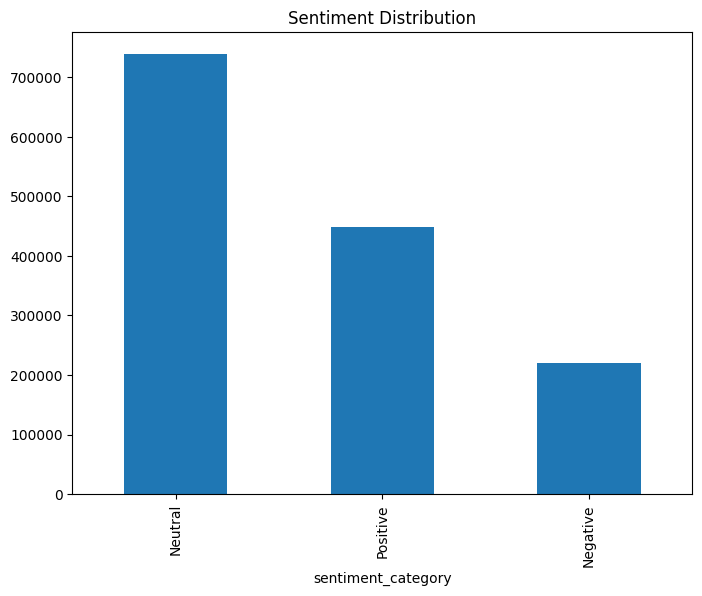

In [46]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Distribution')
plt.show()

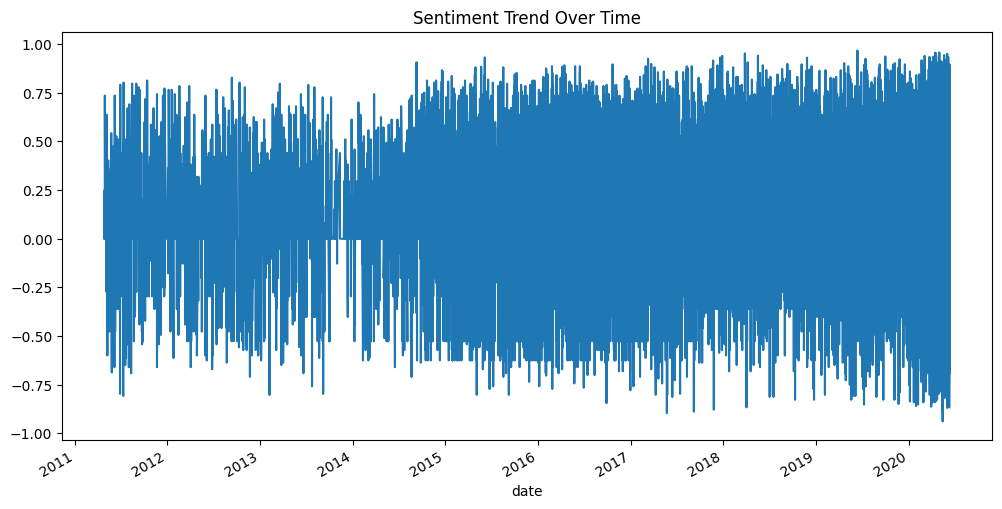

In [48]:
sentiment_trend = df.groupby('date')['sentiment'].mean()
sentiment_trend.plot(figsize=(12, 6))
plt.title('Sentiment Trend Over Time')
plt.show()